### Importing the required libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
data = pd.read_csv('../data/boston_housing.csv')

### Exploring the data structure:

In [7]:
# # Display basic information about the dataset
# data_info = data.info()

# # Display first five rows
# data_head = data.head()

# # Summary statistics
# data_describe = data.describe()

# # Check for missing values
# missing_values = data.isnull().sum()

# data_info, data_head, data_describe, missing_values

In [9]:
# 1. Explore Data Structure and Types
print("First 5 rows of the dataset:")
print(data.head())
print("\nData Info:")
print(data.info())
print(f"\nShape of the dataset: {data.shape}")

First 5 rows of the dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int

In [11]:
# 2. Summary Statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std   

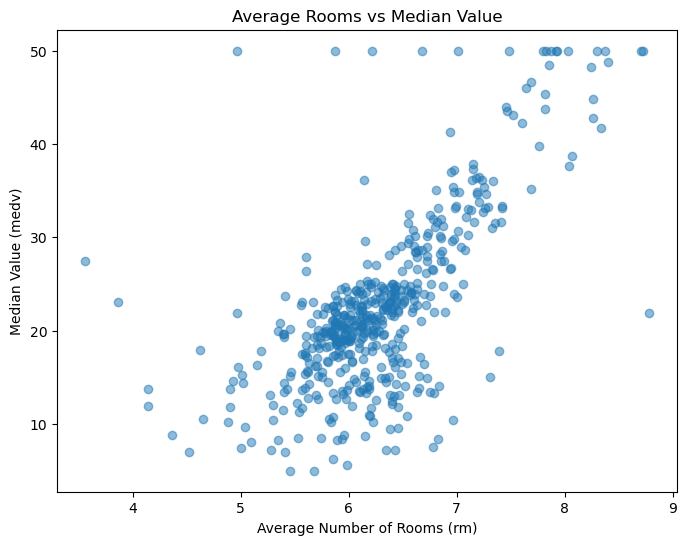

In [13]:
# 3. Visualize Relationships with Target Variable ('medv')
# Scatter plot: rm vs medv
plt.figure(figsize=(8, 6))
plt.scatter(data['rm'], data['medv'], alpha=0.5)
plt.title('Average Rooms vs Median Value')
plt.xlabel('Average Number of Rooms (rm)')
plt.ylabel('Median Value (medv)')
plt.show()

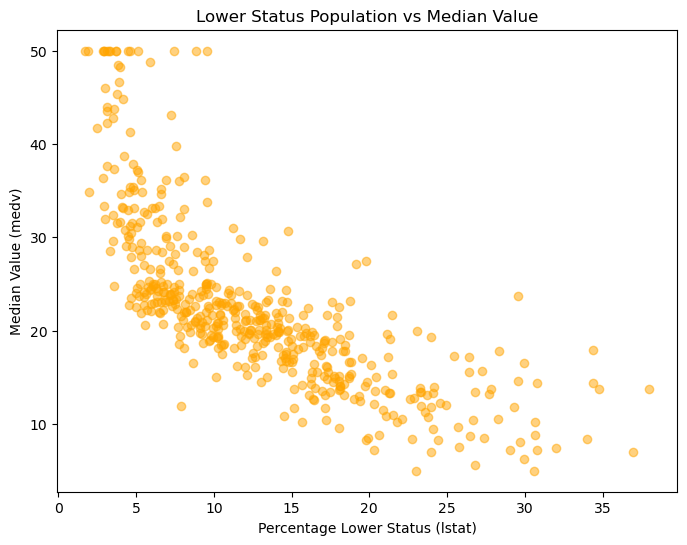

In [14]:
# Scatter plot: lstat vs medv
plt.figure(figsize=(8, 6))
plt.scatter(data['lstat'], data['medv'], alpha=0.5, color='orange')
plt.title('Lower Status Population vs Median Value')
plt.xlabel('Percentage Lower Status (lstat)')
plt.ylabel('Median Value (medv)')
plt.show()

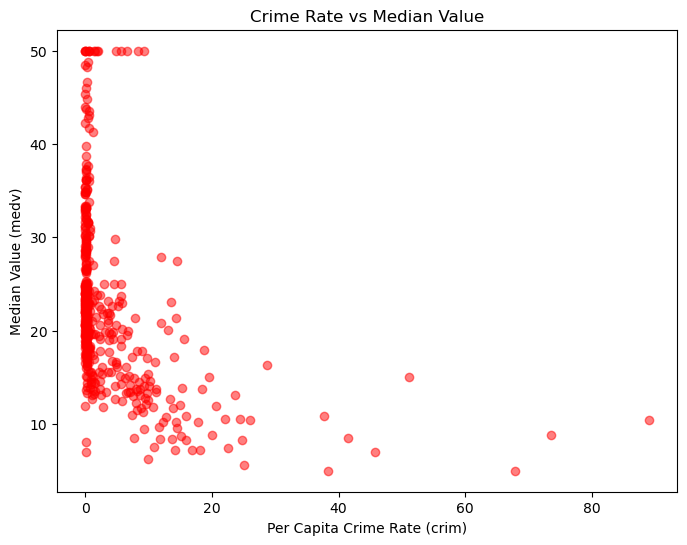

In [16]:
# Scatter plot: crim vs medv
plt.figure(figsize=(8, 6))
plt.scatter(data['crim'], data['medv'], alpha=0.5, color='red')
plt.title('Crime Rate vs Median Value')
plt.xlabel('Per Capita Crime Rate (crim)')
plt.ylabel('Median Value (medv)')
plt.show()

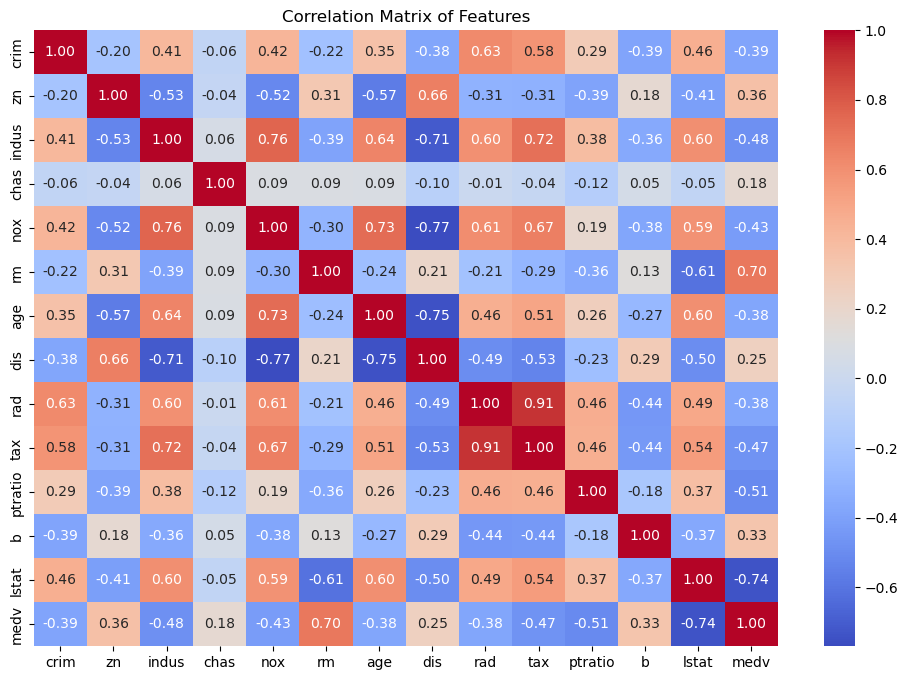

In [17]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [19]:
# 4. Identify Missing Values and Outliers
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [20]:
# Identify outliers using IQR method for selected columns
def detect_outliers(df, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers

In [22]:
# Check outliers in 'crim', 'zn', 'b', and 'lstat'
for col in ['crim', 'zn', 'b', 'lstat']:
    outliers = detect_outliers(data, col)
    print(f"\nOutliers in {col}:")
    print(outliers)
    print(f"Number of outliers: {len(outliers)}")


Outliers in crim:
367    13.5222
371     9.2323
373    11.1081
374    18.4982
375    19.6091
        ...   
468    15.5757
469    13.0751
477    15.0234
478    10.2330
479    14.3337
Name: crim, Length: 66, dtype: float64
Number of outliers: 66

Outliers in zn:
39     75.0
40     75.0
54     75.0
55     90.0
56     85.0
       ... 
351    60.0
352    60.0
353    90.0
354    80.0
355    80.0
Name: zn, Length: 68, dtype: float64
Number of outliers: 68

Outliers in b:
18     288.99
25     303.42
27     306.38
32     232.60
34     248.31
        ...  
466     22.01
467    331.29
475    302.76
489    344.05
490    318.43
Name: b, Length: 77, dtype: float64
Number of outliers: 77

Outliers in lstat:
141    34.41
373    34.77
374    37.97
387    31.99
412    34.37
414    36.98
438    34.02
Name: lstat, dtype: float64
Number of outliers: 7


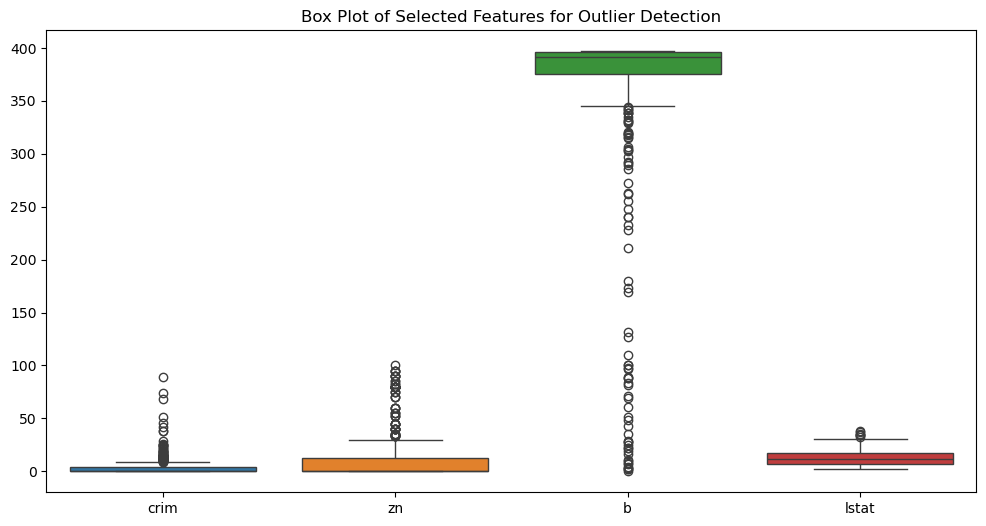

In [24]:
# Box plot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['crim', 'zn', 'b', 'lstat']])
plt.title('Box Plot of Selected Features for Outlier Detection')
plt.show()